In [1]:
#If you run this yourself, make sure all libraries are installed and the csv file is in the same folder as the notebook
#import libraries
import numpy as np
import pandas as pd
import matplotlib as mlp
from matplotlib import pyplot as plt
mlp.rcParams['figure.dpi'] = 300
import scipy.stats
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE

In [2]:
#import human graded data as pandas df
HG_EM = pd.read_csv("EM.csv") 
HG_QM = pd.read_csv("QM.csv") 
HG_CM = pd.read_csv("CM.csv") 
#import no markscheme data as pandas df
NMS_EM = pd.read_csv("Claude_EM_NMS.csv") 
NMS_QM = pd.read_csv("Claude_QM_NMS.csv")
NMS_CM = pd.read_csv("Claude_CM_NMS.csv")
#import markscheme data as pandas df
MS_EM = pd.read_csv("Claude_EM_MS.csv") 
MS_QM = pd.read_csv("Claude_QM_MS.csv")
MS_CM = pd.read_csv("Claude_CM_MS.csv")

In [3]:
#Examine the human graded data
HG_EM

,Question,Total Marks,M1_Solution 1:,M1_Solution 2:,M1_Solution 3:,M2_Solution 1,M2_Solution 2:,M2_Solution 3:
0,1,8,6,8,5,7,8,7
1,2,5,4,5,5,4,4,4
2,3,14,6,4,4,5,4,5
3,4,11,10,5,9,9,6,9
4,5,11,1,1,1,1,1,1
5,6,5,4,5,4,4,4,4
6,7,6,4,4,4,6,6,4
7,8,6,6,2,4,6,1,4
8,9,15,11,8,8,13,11,11
9,10,7,1,4,3,2,3,3


This seems alright, so we'll leave it as is for now. We don't need to make the initial changes as pandas does that for us. The code should work in either case. Now we need to average the solution grades. 

In [4]:
from data_preprocess import process
HG = process(HG_EM, HG_CM, HG_QM)
HG_EM = HG[0]
HG_CM = HG[1]
HG_QM = HG[2]

In [5]:
HG_CM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,4,2.5,0.625000,0.125000
1,2,6,6.0,1.000000,0.000000
2,3,6,5.5,0.916667,0.083333
3,4,18,12.0,0.666667,0.000000
4,5,9,8.0,0.888889,0.111111
5,6,16,2.0,0.125000,0.000000
6,7,13,10.0,0.769231,0.000000
7,8,10,10.0,1.000000,0.000000
8,9,7,6.5,0.928571,0.071429
9,10,8,6.0,0.750000,0.000000


In [6]:
#Examine the self graded data
NMS_EM

,Question,Total Marks,Unnamed: 2,Solution 1:,Solution 2:,Solution 3:,Unnamed: 6,Solution 1:.1,Solution 2:.1,Solution 3:.1,...,Solution 2:.2,Solution 3:.2,Unnamed: 14,Solution 1:.3,Solution 2:.3,Solution 3:.3,Unnamed: 18,Solution 1:.4,Solution 2:.4,Solution 3:.4
0,1,8,NaN,8,7,7,NaN,8,7,8,...,7,8,NaN,8,7,7,NaN,8,7,7
1,2,5,NaN,4,3,5,NaN,5,4,5,...,4,5,NaN,5,4,5,NaN,5,4,5
2,3,14,NaN,13,14,12,NaN,13,14,12,...,13,14,NaN,12,13,14,NaN,12,13,14
3,4,11,NaN,10,5,10,NaN,10,7,10,...,6,10,NaN,10,6,10,NaN,11,6,10
4,5,11,NaN,8,9,11,NaN,8,8,11,...,8,11,NaN,9,8,11,NaN,8,9,11
5,6,5,NaN,4,5,5,NaN,5,5,5,...,5,5,NaN,5,5,5,NaN,5,5,5
6,7,6,NaN,6,5,5,NaN,6,5,5,...,5,5,NaN,6,5,5,NaN,6,5,5
7,8,6,NaN,5,3,6,NaN,6,3,5,...,3,5,NaN,5,3,6,NaN,6,3,5
8,9,15,NaN,13,14,15,NaN,15,15,14,...,14,15,NaN,15,15,13,NaN,13,15,14
9,10,7,NaN,4,5,6,NaN,4,5,6,...,5,6,NaN,4,5,6,NaN,4,5,6


Couple things need to be changed. Index vs Question is fine. We need to removed all unnamed 

In [7]:
from data_preprocess import que_process
SG = que_process(NMS_EM, NMS_CM, NMS_QM, MS_EM, MS_CM, MS_QM)

In [8]:
#Assigning names
NMS_EM = SG[0]
NMS_CM = SG[1]
NMS_QM = SG[2]
MS_EM = SG[3]
MS_CM = SG[4]
MS_QM = SG[5] 

In [9]:
MS_EM

,Questions,Total Marks,Marks,Norm,Norm Std
0,1,8,7.0,0.875000,0.000000
1,2,5,5.0,1.000000,0.000000
2,3,14,10.4,0.742857,0.017496
3,4,11,10.6,0.963636,0.022268
4,5,11,2.6,0.236364,0.022268
5,6,5,5.0,1.000000,0.000000
6,7,6,4.8,0.800000,0.033333
7,8,6,5.0,0.833333,0.000000
8,9,15,13.2,0.880000,0.013333
9,10,7,4.0,0.571429,0.000000


# Regression Markscheme vs No Markscheme

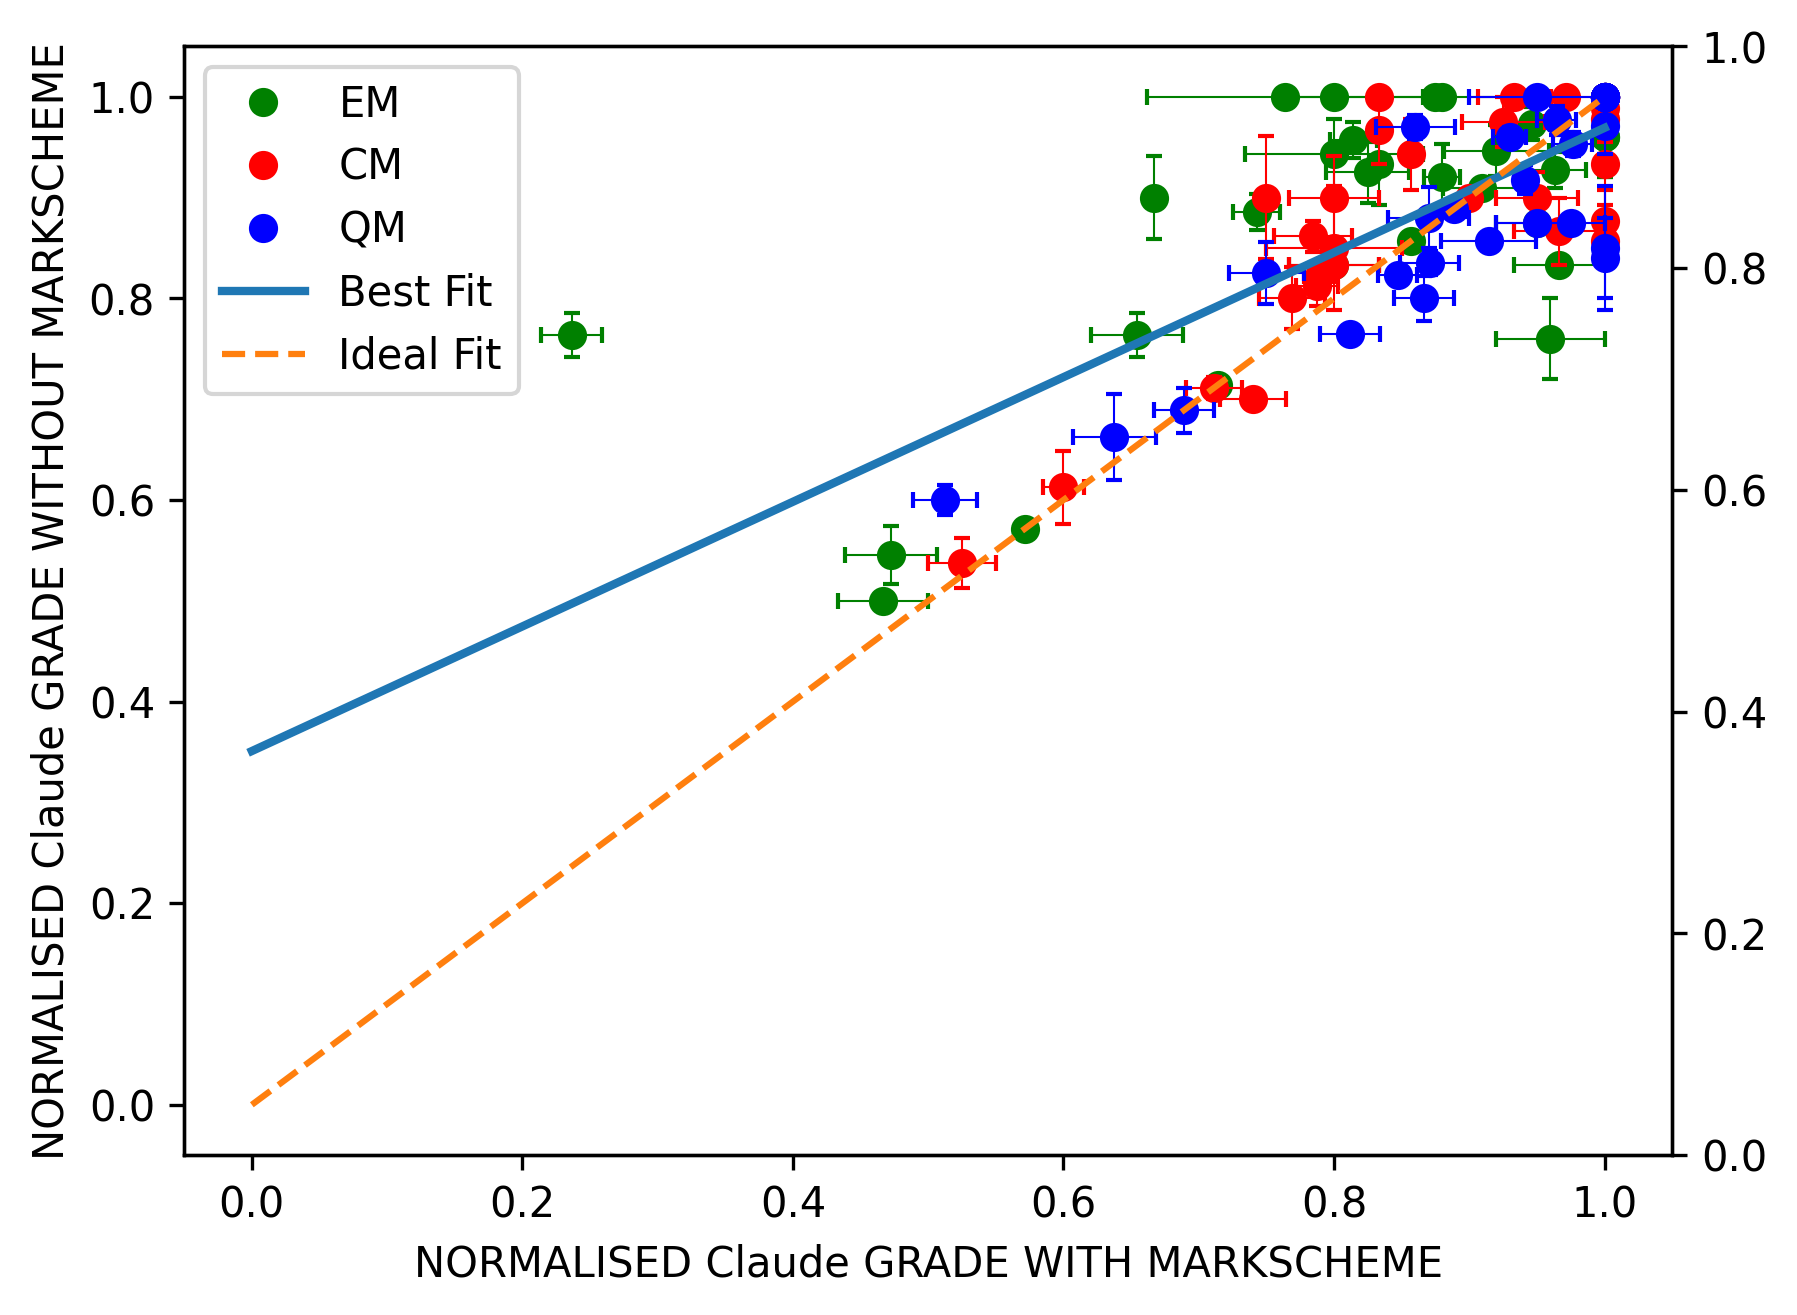

In [10]:
MS = [MS_EM, MS_CM, MS_QM]
NMS = [NMS_EM, NMS_CM, NMS_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']

# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)

# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the different points on the first axis
for i, (dfi, dfj) in enumerate(zip(MS, NMS)):
    # Plot data and set labels
    ax1.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    ax1.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels for the first y-axis
ax1.set_xlabel('NORMALISED Claude GRADE WITH MARKSCHEME')
ax1.set_ylabel('NORMALISED Claude GRADE WITHOUT MARKSCHEME')

# Fit the trend line for the first axis
z = np.polyfit(concat_MS['Norm'], concat_NMS['Norm'], 1)
p = np.poly1d(z)
ax1.plot(np.linspace(0, 1, 2), p(np.linspace(0, 1, 2)), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
ax1.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Show the plot with the added right-side y-axis
ax1.legend(loc='upper left')
plt.savefig("Claude_MvNM.png")
plt.show()

In [11]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_NMS['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.7631719064851543, pvalue=2.261904489771836e-18)

# Regression Markscheme vs Human Graded

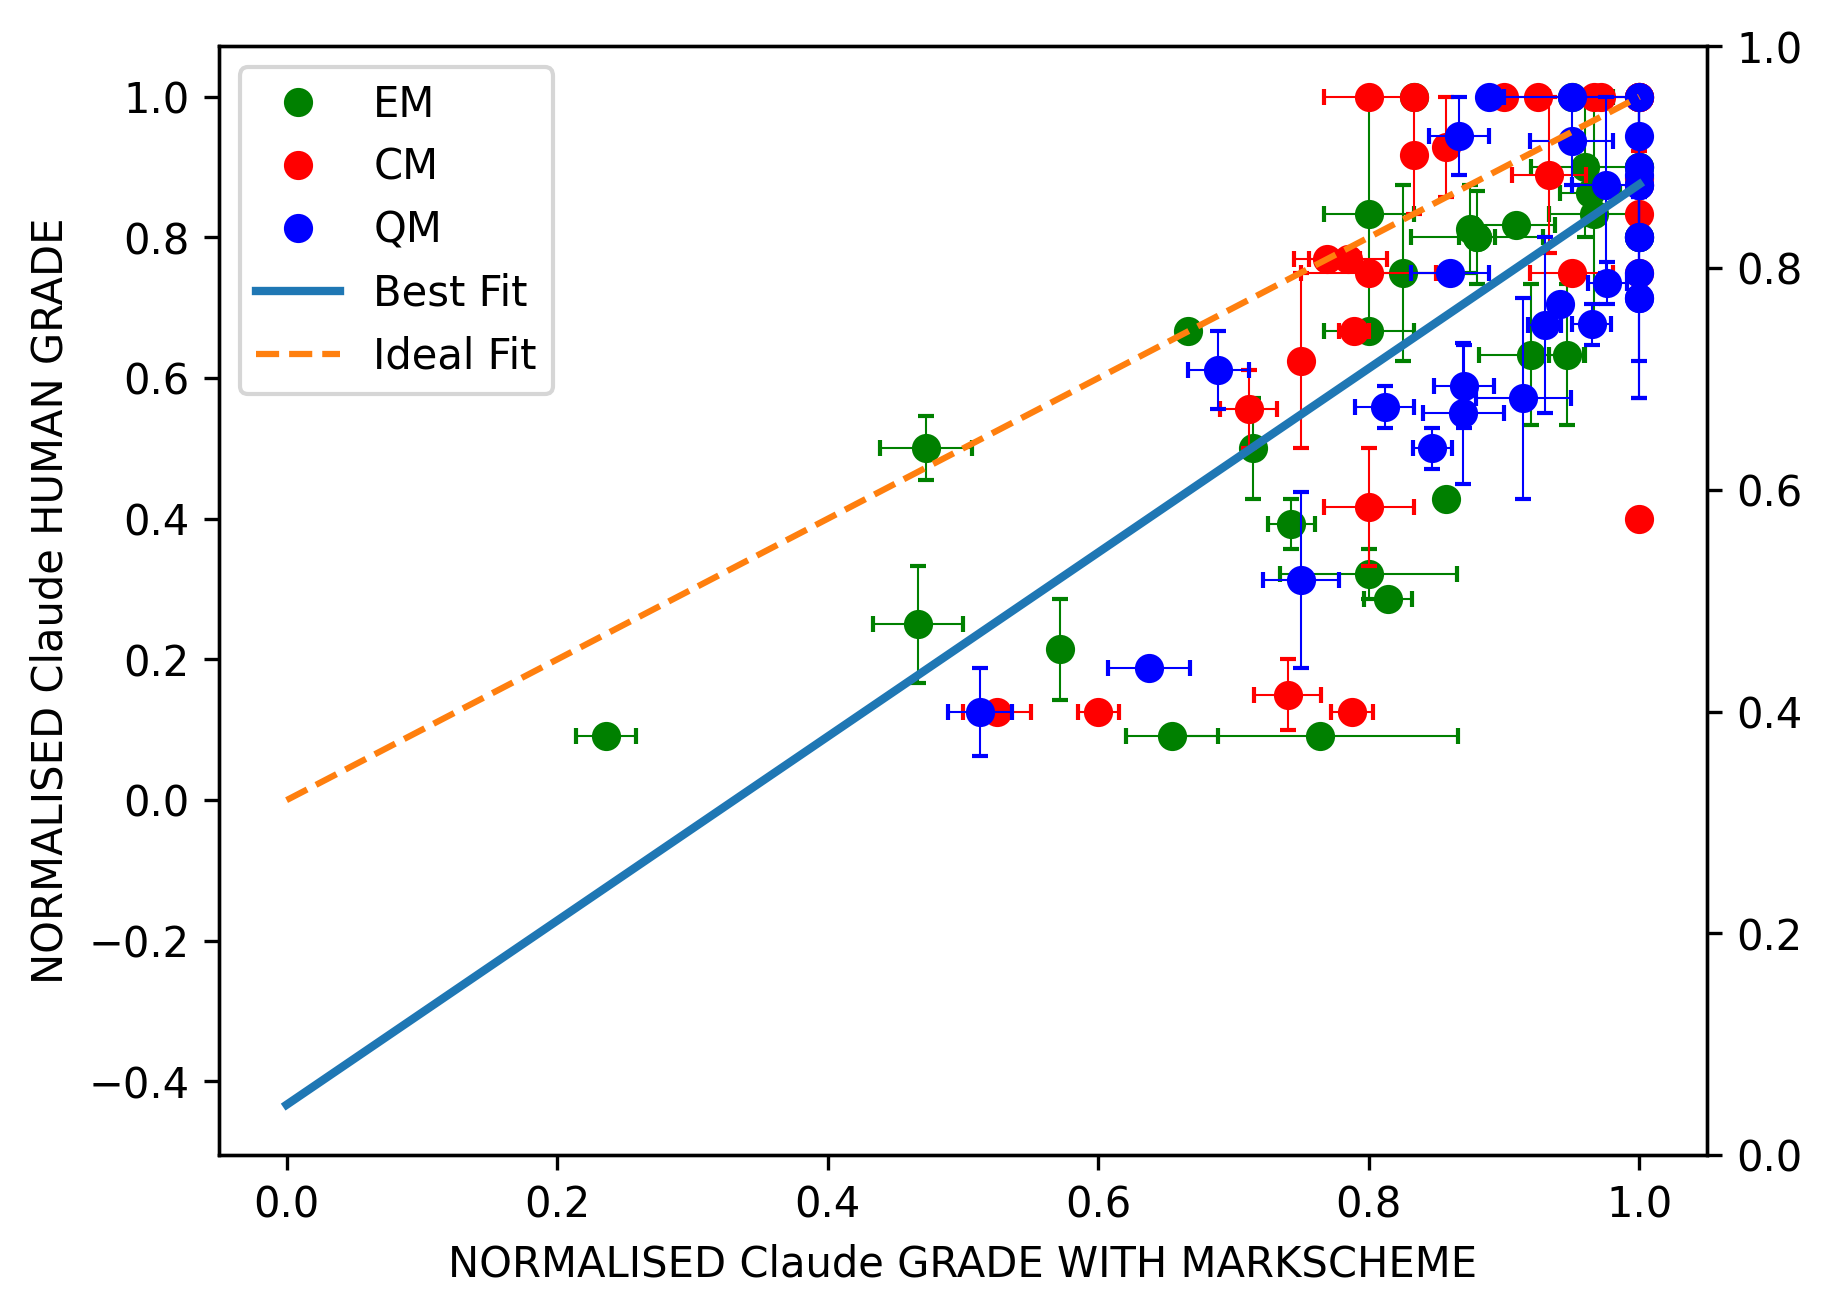

In [12]:
MS = [MS_EM, MS_CM, MS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']


# Concatenate data for trend line calculation
concat_MS = pd.concat(MS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Plot the different points
fig, ax1 = plt.subplots()
for i, (dfi, dfj) in enumerate(zip(MS, HG)):
    # Plot data and set labels
    ax1.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    ax1.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels for the first y-axis
ax1.set_xlabel('NORMALISED Claude GRADE WITH MARKSCHEME')
ax1.set_ylabel('NORMALISED Claude HUMAN GRADE')

# Fit the trend line
z = np.polyfit(concat_MS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
ax1.plot(np.linspace(0, 1, 2), p(np.linspace(0, 1, 2)), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
ax1.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Show the plot with legend
ax1.legend(loc='upper left')
plt.savefig("Claude_MvHG.png")
plt.show()

In [13]:
scipy.stats.pearsonr(concat_MS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.7216042392248657, pvalue=1.0281377700023672e-15)

# Regression No Markscheme vs Human Graded

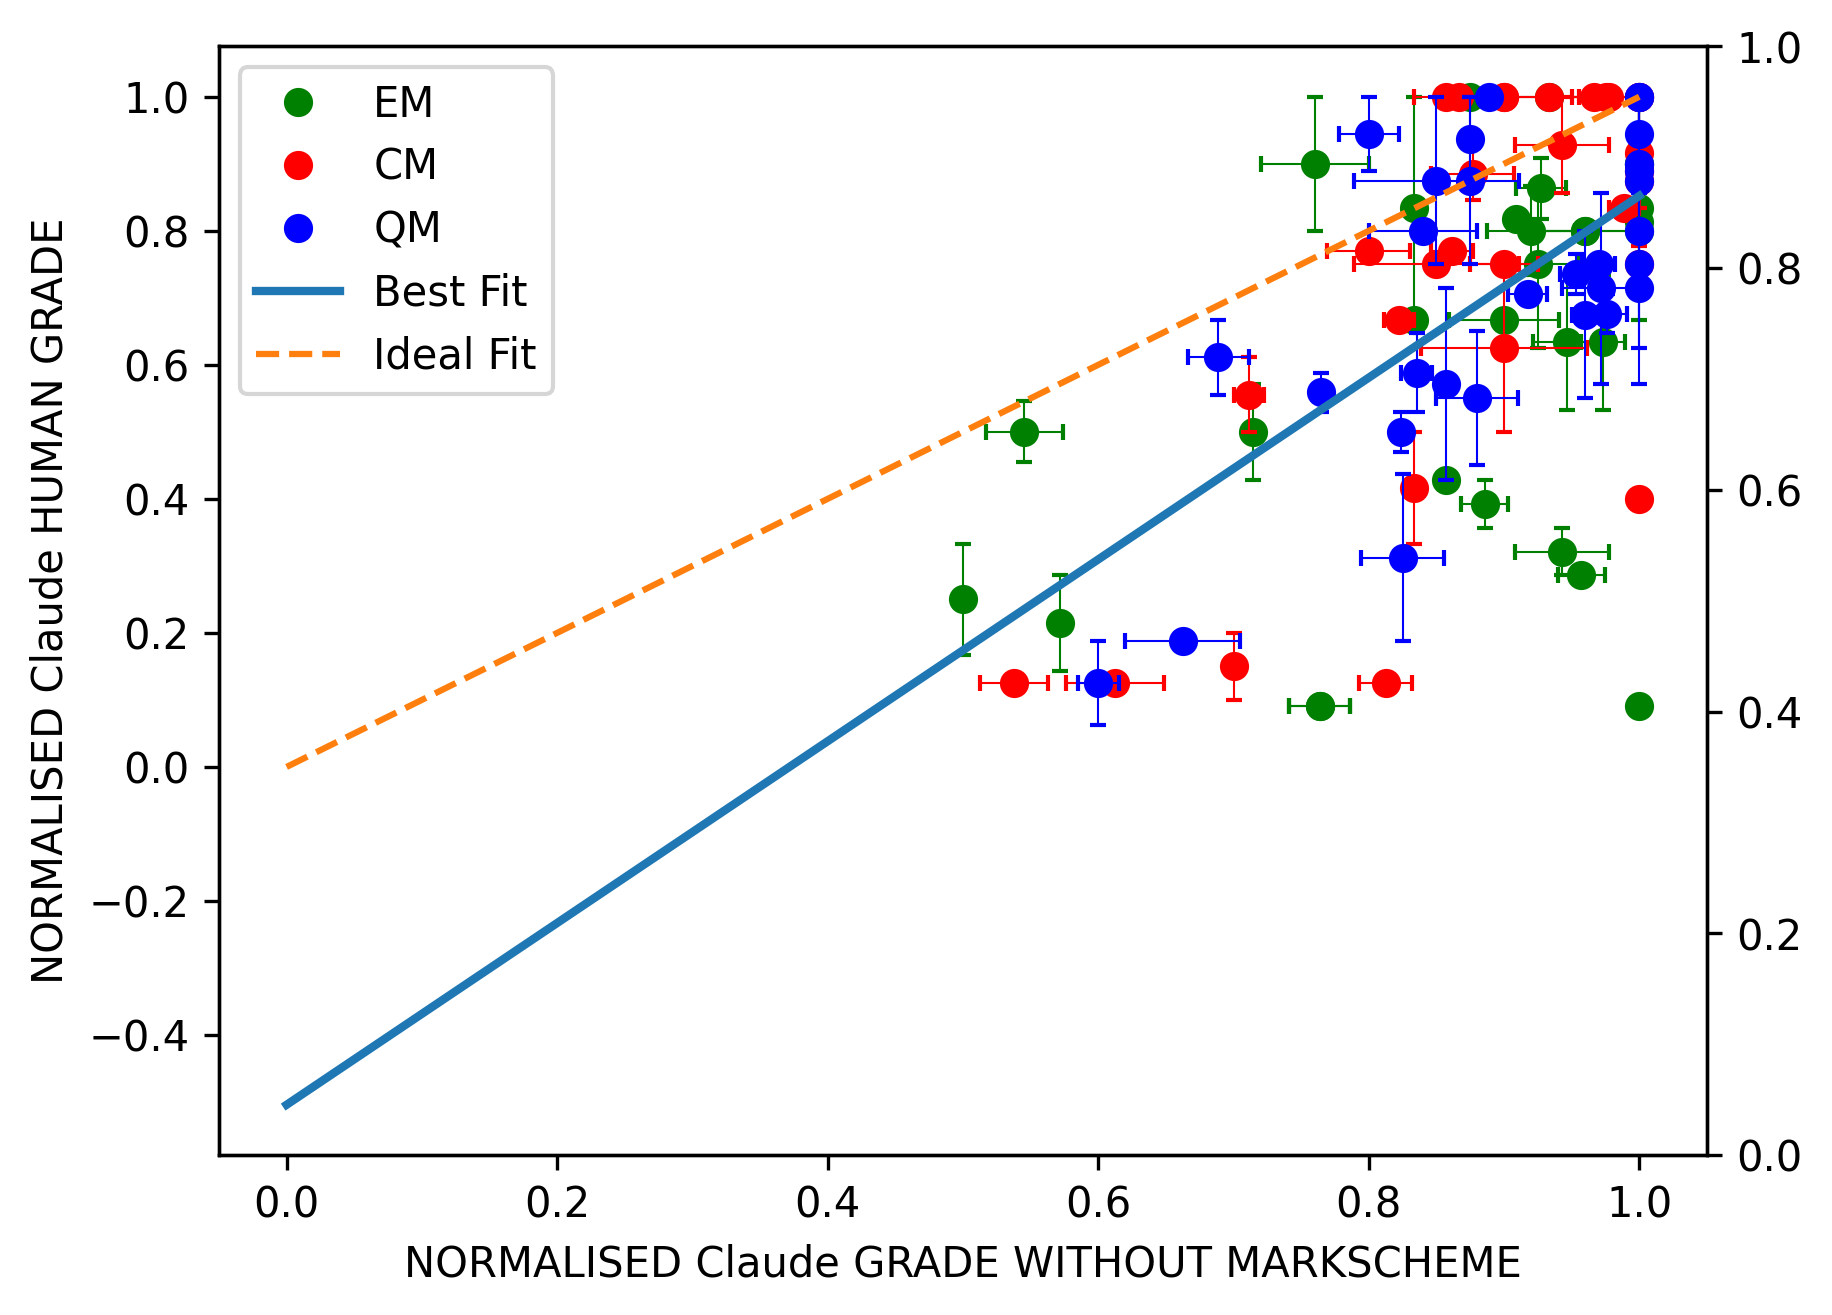

In [14]:
NMS = [NMS_EM, NMS_CM, NMS_QM]
HG = [HG_EM, HG_CM, HG_QM]
colr = ['green', 'red', 'blue']
names = ['EM', 'CM', 'QM']


# Concatenate data for trend line calculation
concat_NMS = pd.concat(NMS, ignore_index=True, axis=0)
concat_HG = pd.concat(HG, ignore_index=True, axis=0)

# Create the figure and the first axis
fig, ax1 = plt.subplots()

# Plot the different points on the first axis
for i, (dfi, dfj) in enumerate(zip(NMS, HG)):
    # Plot data and set labels
    ax1.plot(dfi['Norm'], dfj['Norm'], 'o', color=colr[i], label=names[i])
    ax1.errorbar(dfi['Norm'], dfj['Norm'], xerr=dfi['Norm Std'], yerr=dfj['Norm Std'], ls='none', elinewidth=0.5, capsize=2, color=colr[i])

# Labels for the first y-axis
ax1.set_xlabel('NORMALISED Claude GRADE WITHOUT MARKSCHEME')
ax1.set_ylabel('NORMALISED Claude HUMAN GRADE')

# Fit the trend line for the first axis
z = np.polyfit(concat_NMS['Norm'], concat_HG['Norm'], 1)
p = np.poly1d(z)
ax1.plot(np.linspace(0, 1, 2), p(np.linspace(0, 1, 2)), "-", linewidth=2, label="Best Fit")

# Ideal Fit line
ax1.plot(np.linspace(0, 1, 2), np.linspace(0, 1, 2), '--', label="Ideal Fit")

# Create a second y-axis on the right side
ax2 = ax1.twinx()

# Show the plot with the added right-side y-axis
ax1.legend(loc='upper left')
plt.savefig("Claude_NMvHG.png")
plt.show()

In [15]:
scipy.stats.pearsonr(concat_NMS['Norm'], concat_HG['Norm']) #(pearson coefficient, p-value)

PearsonRResult(statistic=0.6058217039360171, pvalue=2.5079357664302324e-10)

# Clustering Markscheme vs No Markscheme

In [16]:
clust_data_1 = list(zip(concat_MS['Norm'], concat_NMS['Norm']))

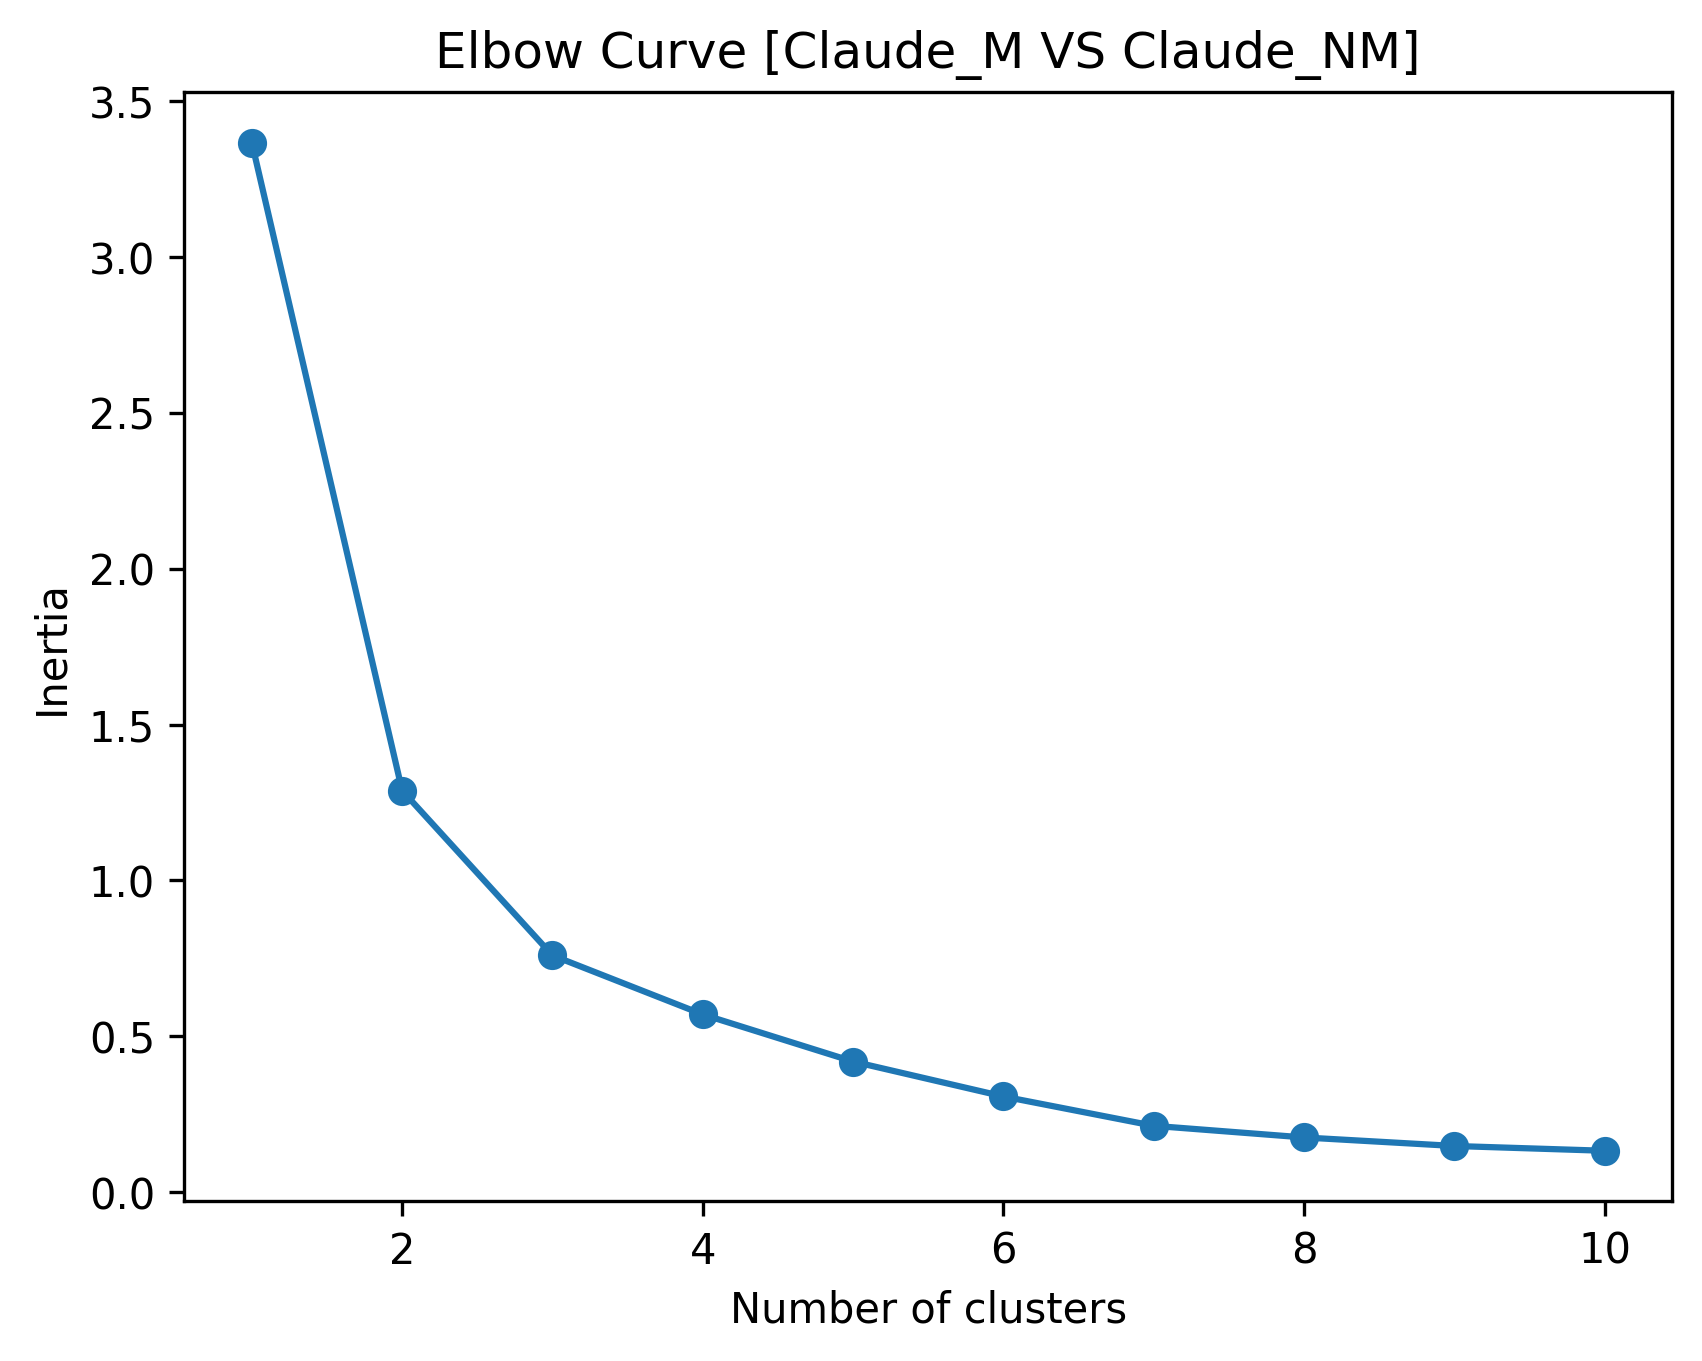

In [17]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_1)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Claude_M VS Claude_NM]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

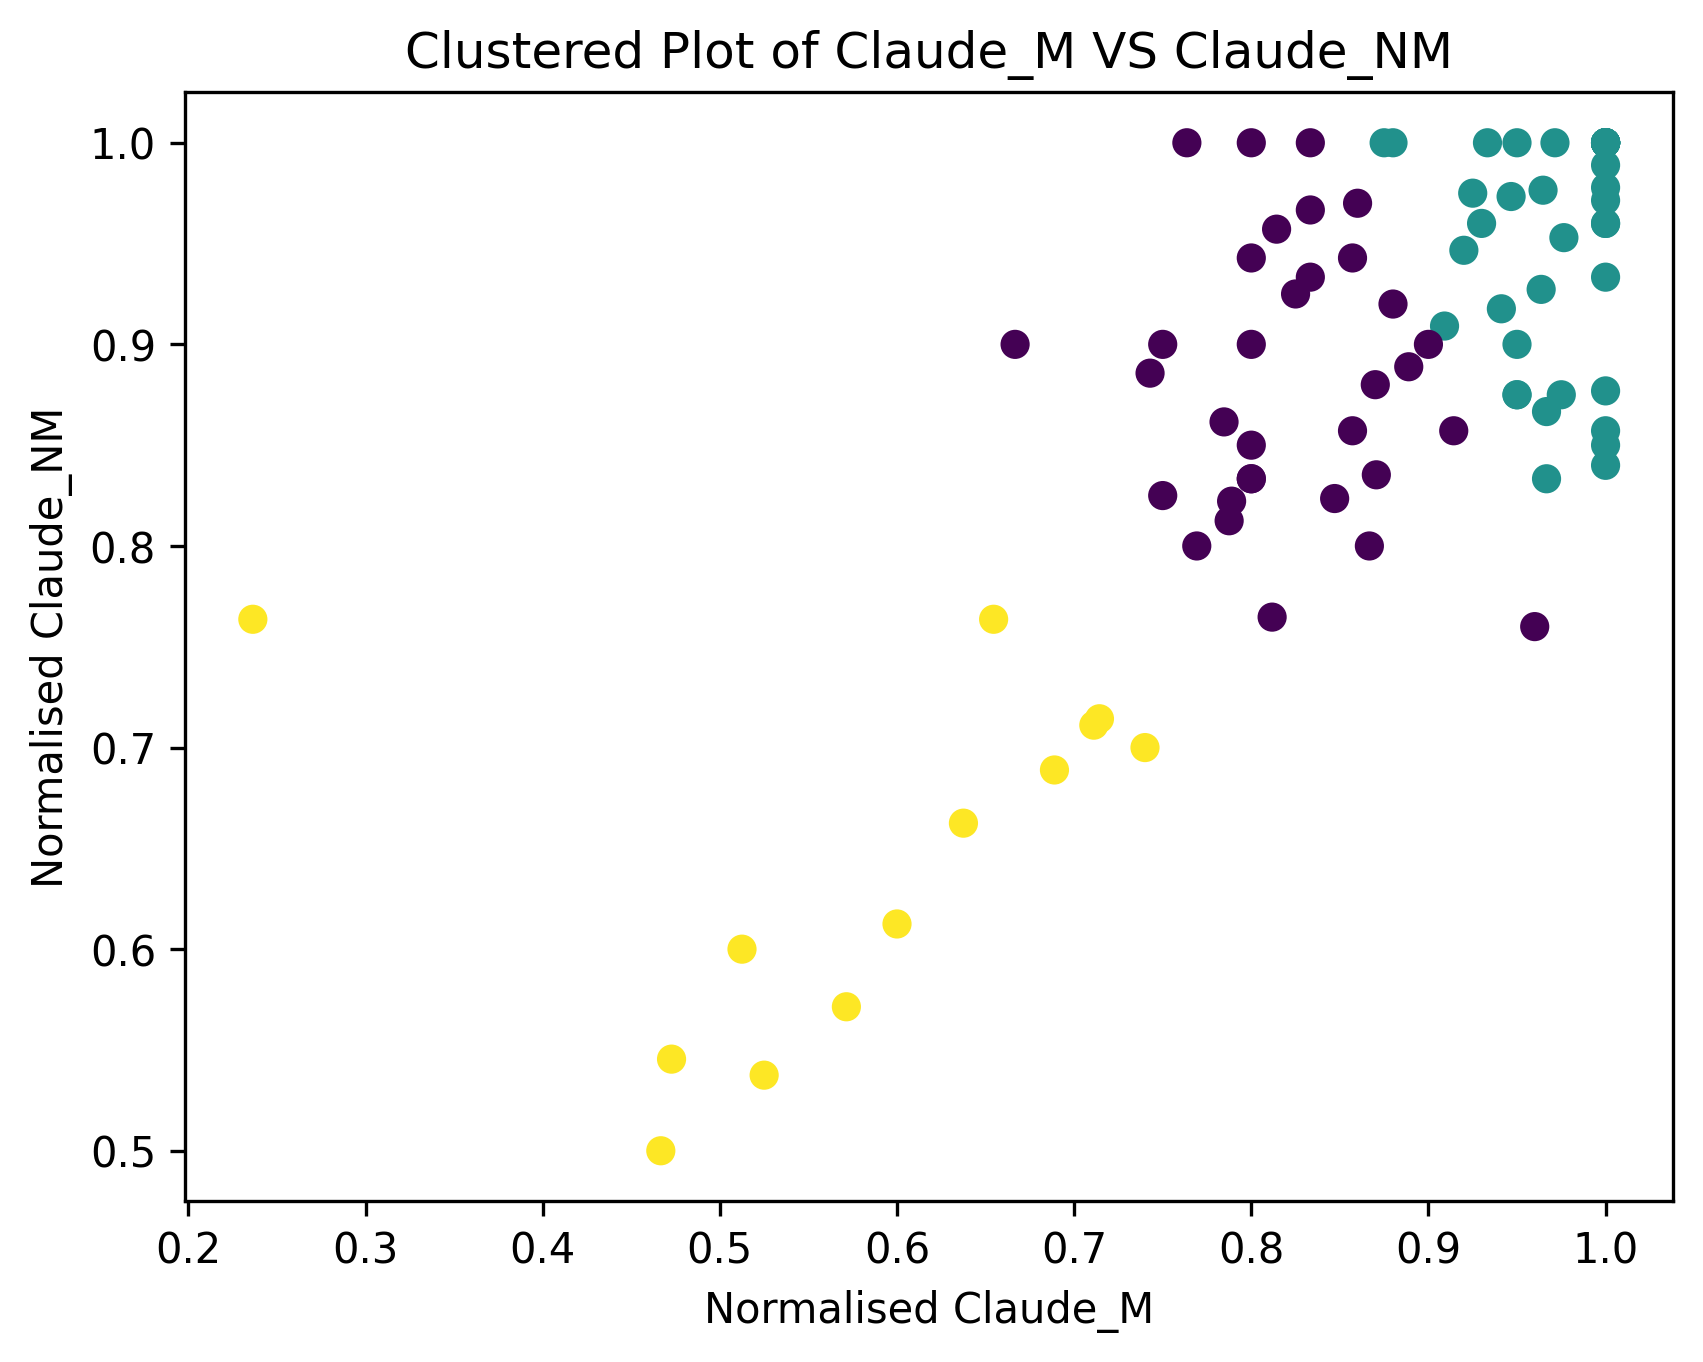

In [18]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_1)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_NMS['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Claude_M")
plt.ylabel("Normalised Claude_NM")
plt.title("Clustered Plot of Claude_M VS Claude_NM")
plt.show()

# Clustering Markscheme vs Human Grading

In [19]:
clust_data_2 = list(zip(concat_MS['Norm'], concat_HG['Norm']))

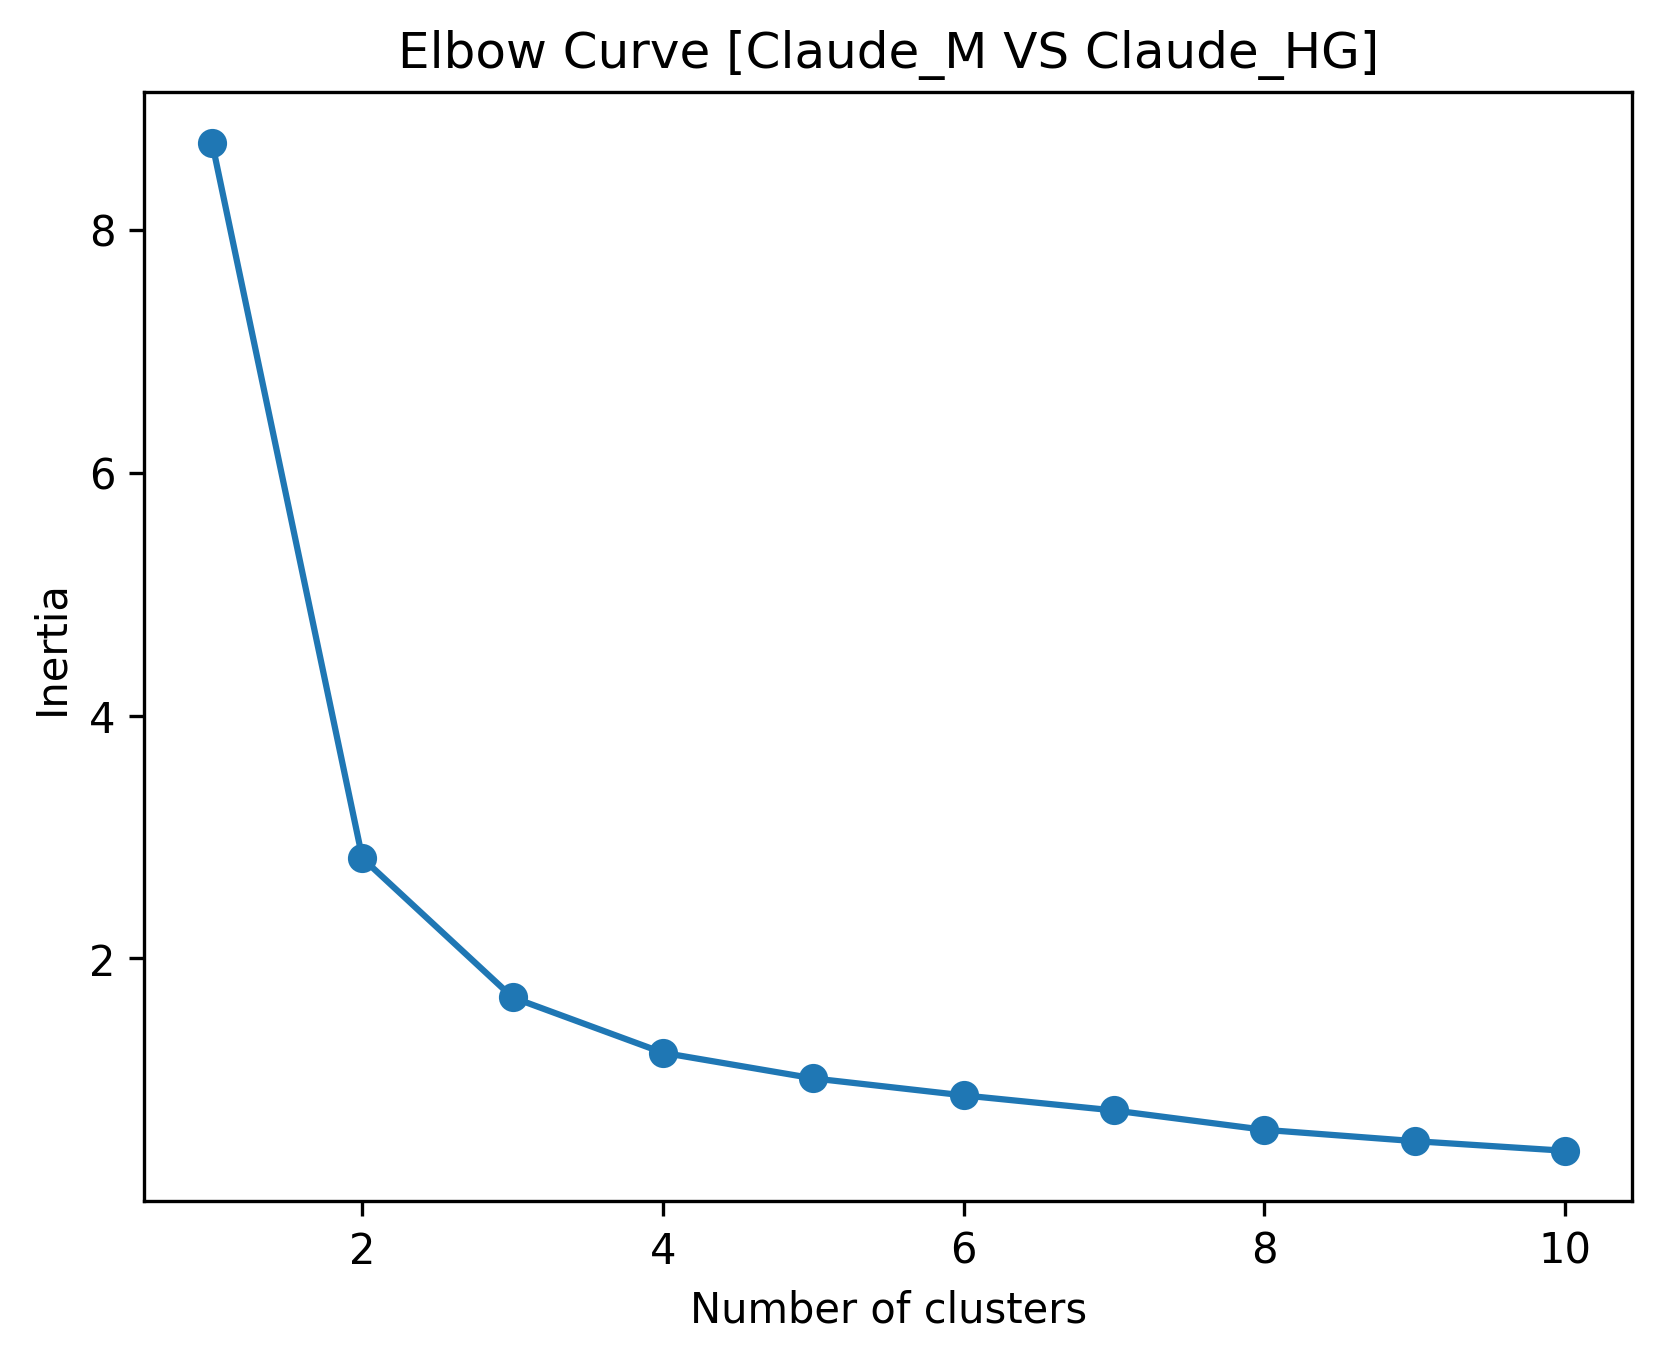

In [20]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_2)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Claude_M VS Claude_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

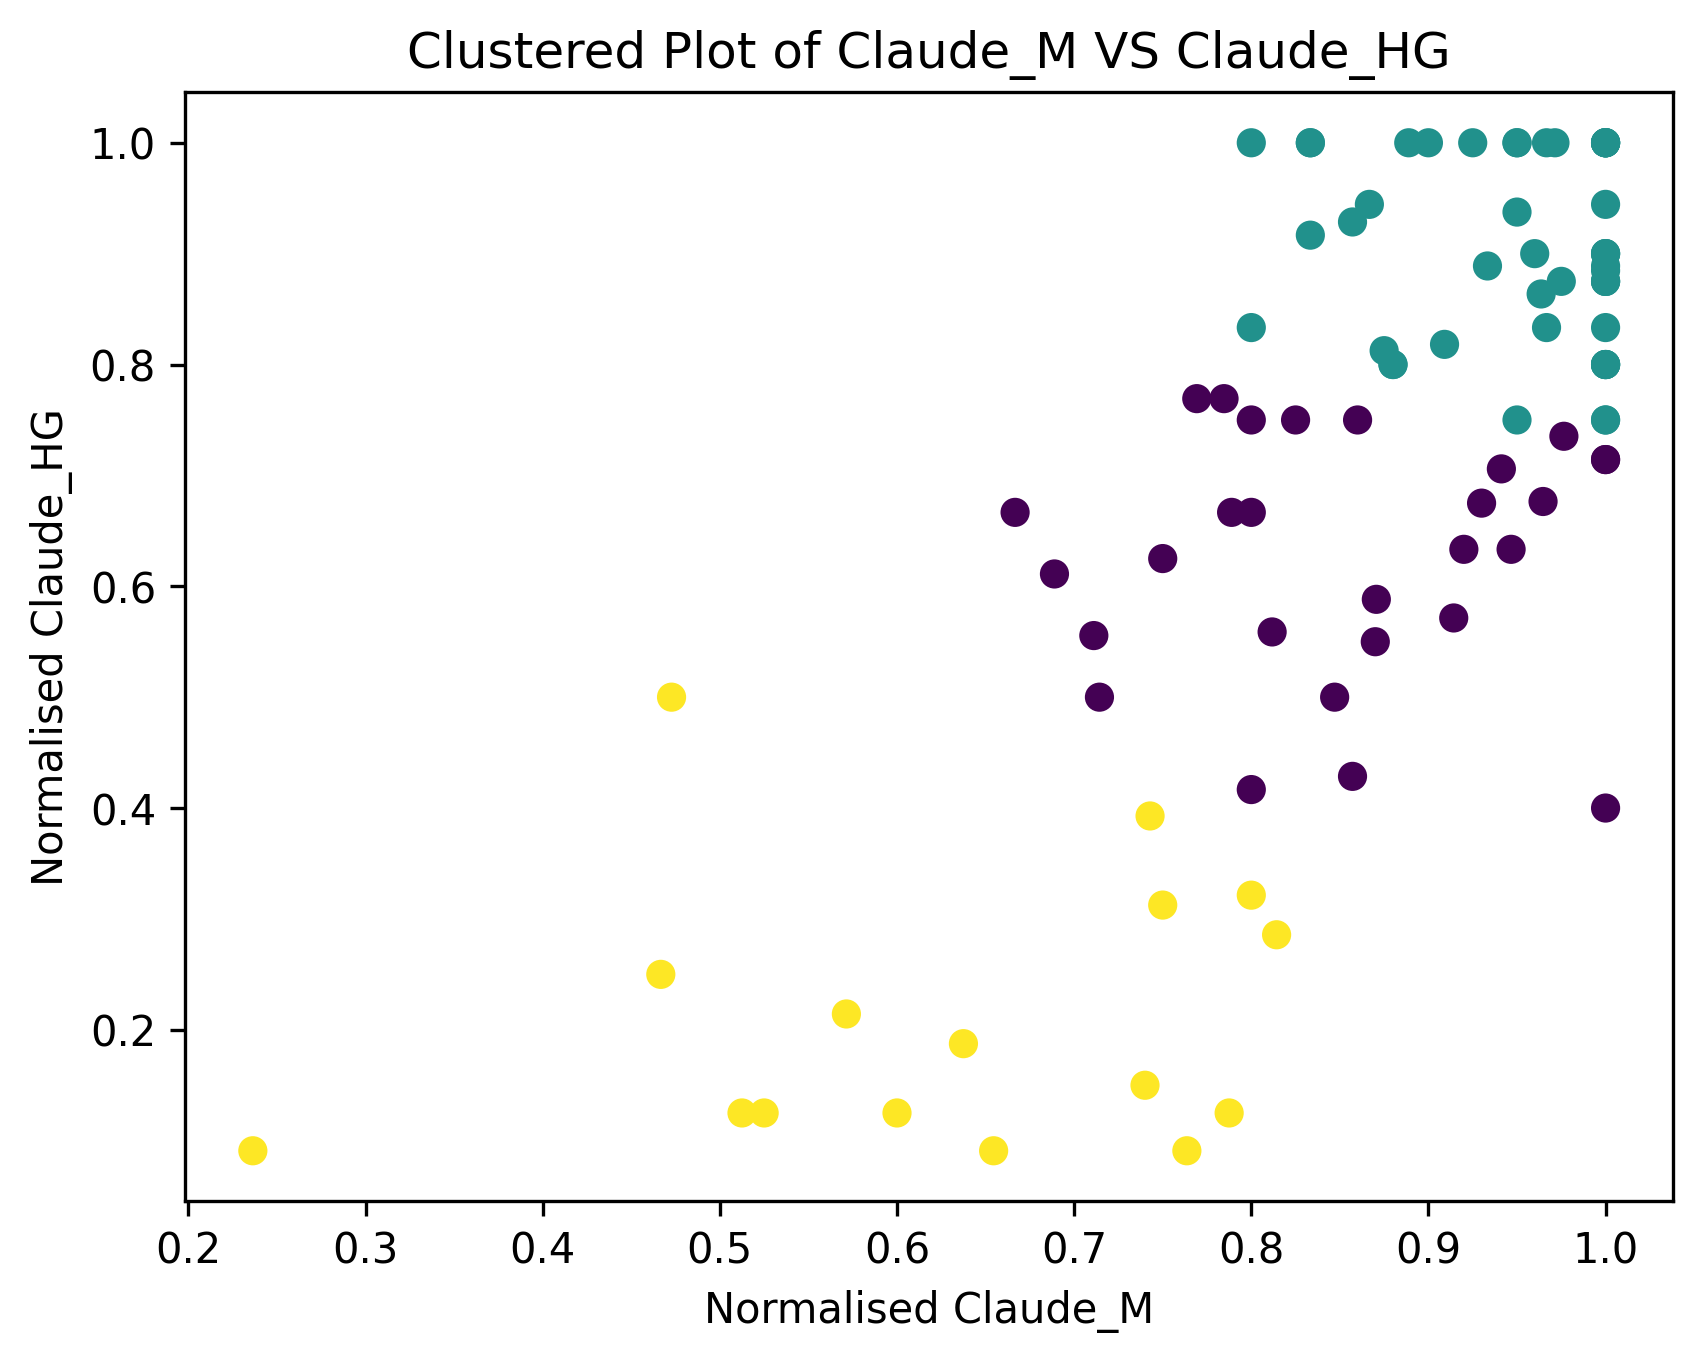

In [21]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_2)

#Plotting classified data
plt.scatter(concat_MS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Claude_M")
plt.ylabel("Normalised Claude_HG")
plt.title("Clustered Plot of Claude_M VS Claude_HG")
plt.show()

# Clustering No Markscheme vs Human Grading

In [22]:
clust_data_3 = list(zip(concat_NMS['Norm'], concat_HG['Norm']))

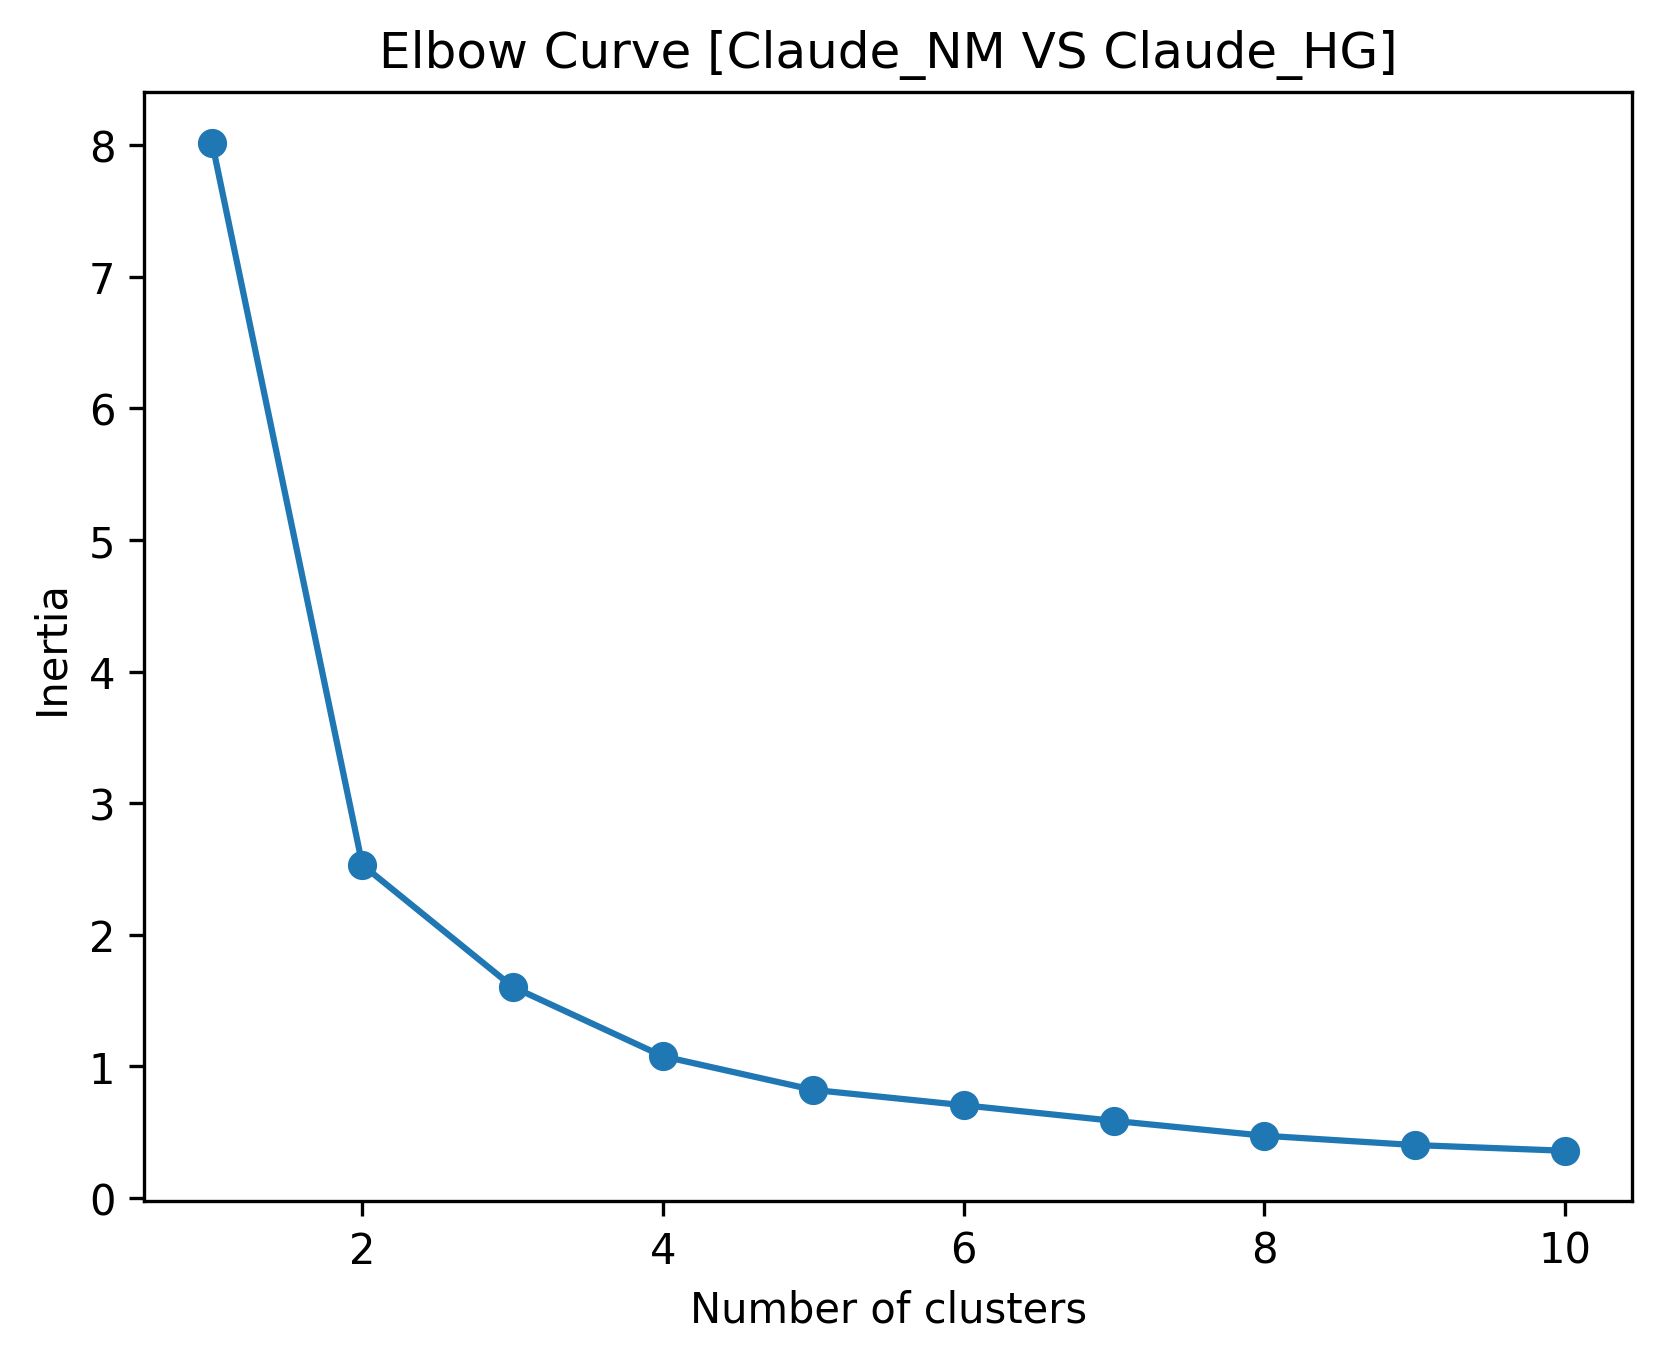

In [23]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_3)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Elbow Curve [Claude_NM VS Claude_HG]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

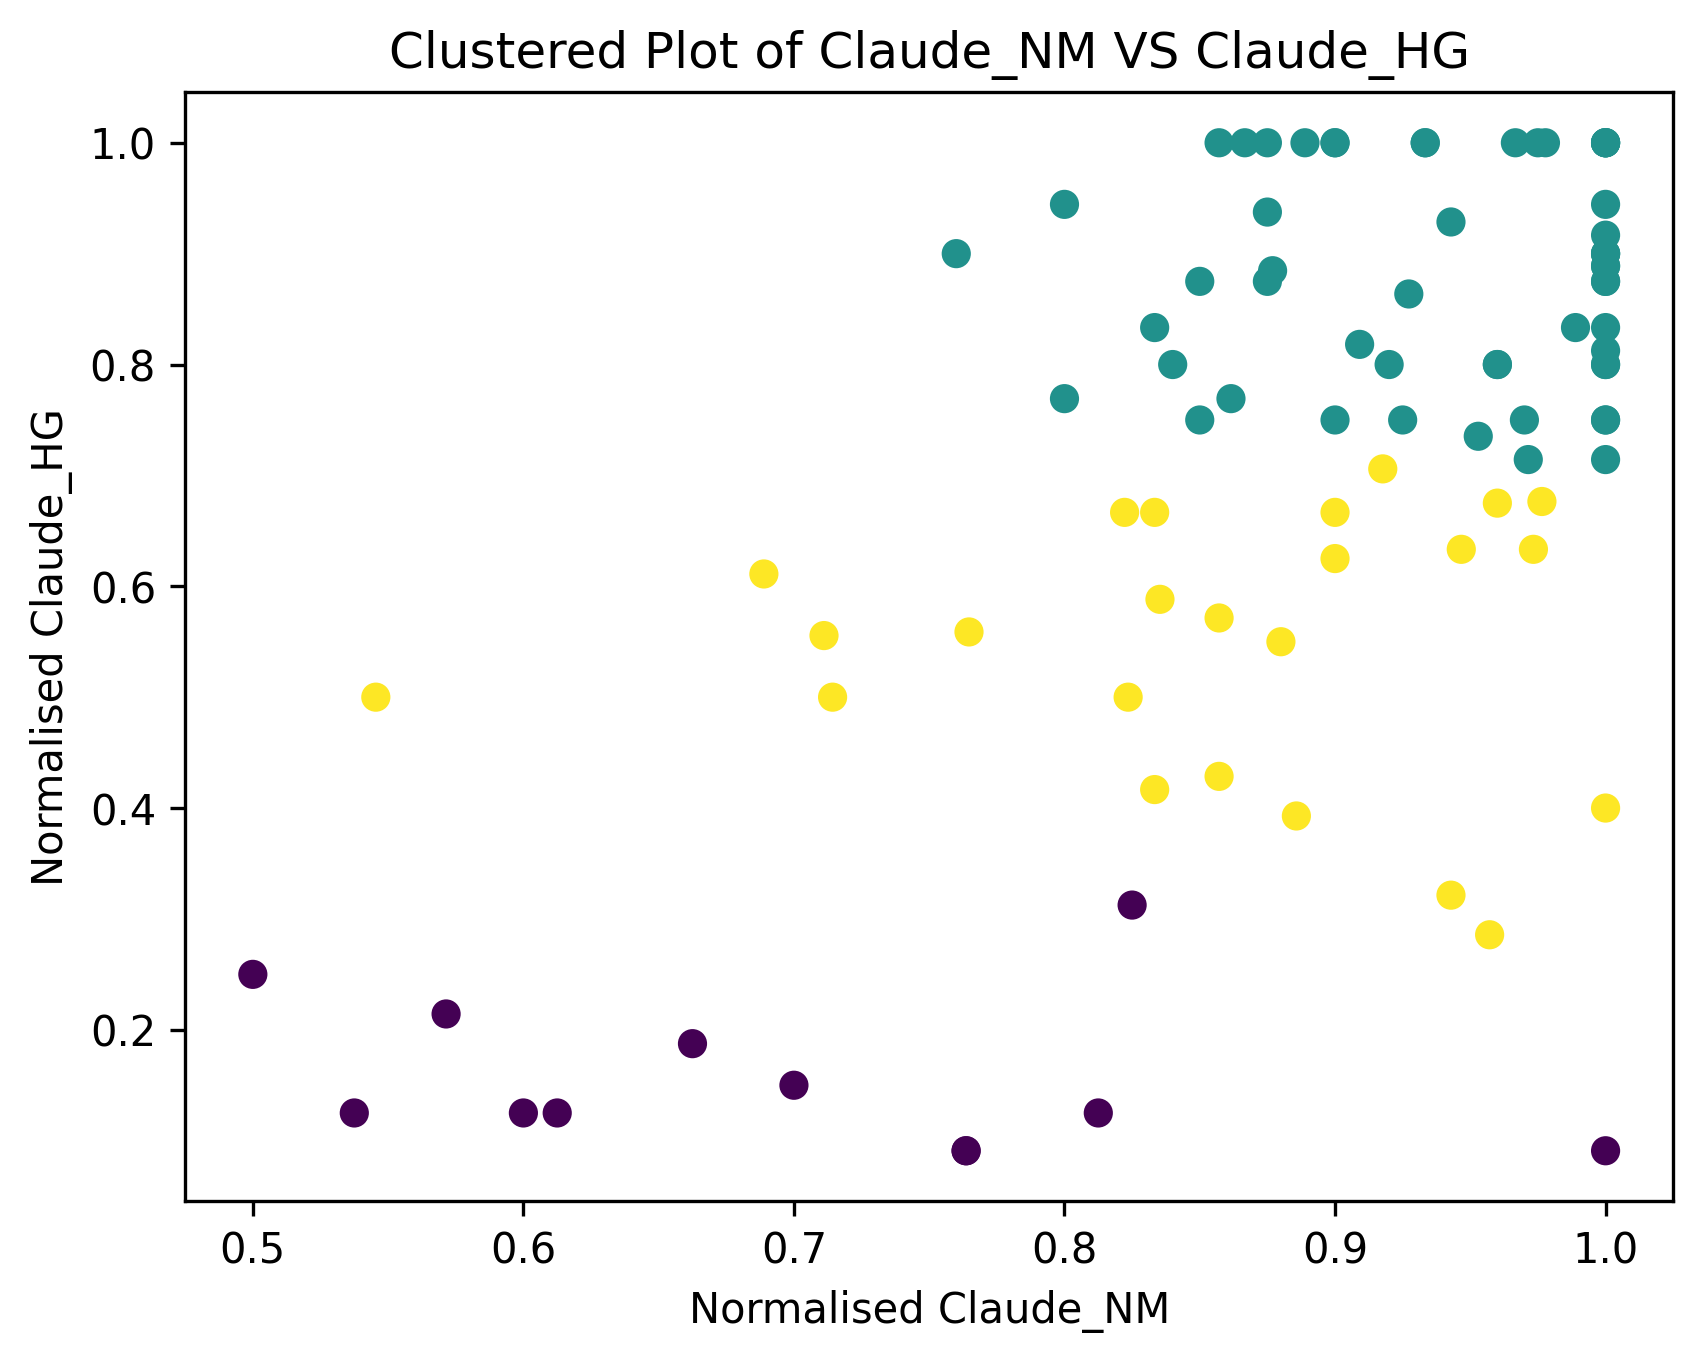

In [24]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_3)

#Plotting classified data
plt.scatter(concat_NMS['Norm'], concat_HG['Norm'], c=kmeans.labels_)
plt.xlabel("Normalised Claude_NM")
plt.ylabel("Normalised Claude_HG")
plt.title("Clustered Plot of Claude_NM VS Claude_HG")
plt.show()

# Implementing t-SNE


In [38]:
red_data = pd.concat([concat_MS, concat_NMS, concat_HG], axis = 1) #creating data with only normalised grades
red_data = red_data.loc[:, ['Norm', 'Norm Std']]
red_data.columns = ['Norm_MS', 'Norm_NMS', 'Norm_HG', 'Norm_Std_MS', 'Norm_Std_NMS', 'Norm_Std_HG']
red_data['GPT_Human_diff'] = ((red_data['Norm_MS'] + red_data['Norm_NMS']) / 2) - red_data['Norm_HG']
red_data


,Norm_MS,Norm_NMS,Norm_HG,Norm_Std_MS,Norm_Std_NMS,Norm_Std_HG,GPT_Human_diff
0,0.875000,1.000000,0.812500,0.000000,0.000000,0.062500,0.125000
1,1.000000,0.960000,0.800000,0.000000,0.040000,0.000000,0.180000
2,0.742857,0.885714,0.392857,0.017496,0.017496,0.035714,0.421429
3,0.963636,0.927273,0.863636,0.022268,0.018182,0.045455,0.081818
4,0.236364,0.763636,0.090909,0.022268,0.022268,0.000000,0.409091
...,...,...,...,...,...,...,...
85,0.847059,0.823529,0.500000,0.014409,0.000000,0.029412,0.335294
86,0.975000,0.875000,0.875000,0.025000,0.000000,0.125000,0.050000
87,1.000000,1.000000,0.944444,0.000000,0.000000,0.055556,0.055556
88,0.941176,0.917647,0.705882,0.000000,0.014409,0.000000,0.223529


In [39]:
#running t-SNE
tsne = TSNE(learning_rate = 500, n_components = 2)
x_tsne = tsne.fit_transform(red_data)
y = np.concatenate(np.stack((np.repeat(1,30), np.repeat(2,30), np.repeat(3,30)), axis = 0)) #creating a subject marker
pd.DataFrame(x_tsne)

,0,1
0,60.346928,6.228626
1,26.537802,84.116142
2,-178.436996,-78.162941
3,86.229507,51.899548
4,-288.318787,-3.590998
...,...,...
85,-133.485413,-67.466499
86,127.611908,16.274683
87,155.829819,82.549828
88,-26.228704,50.020699


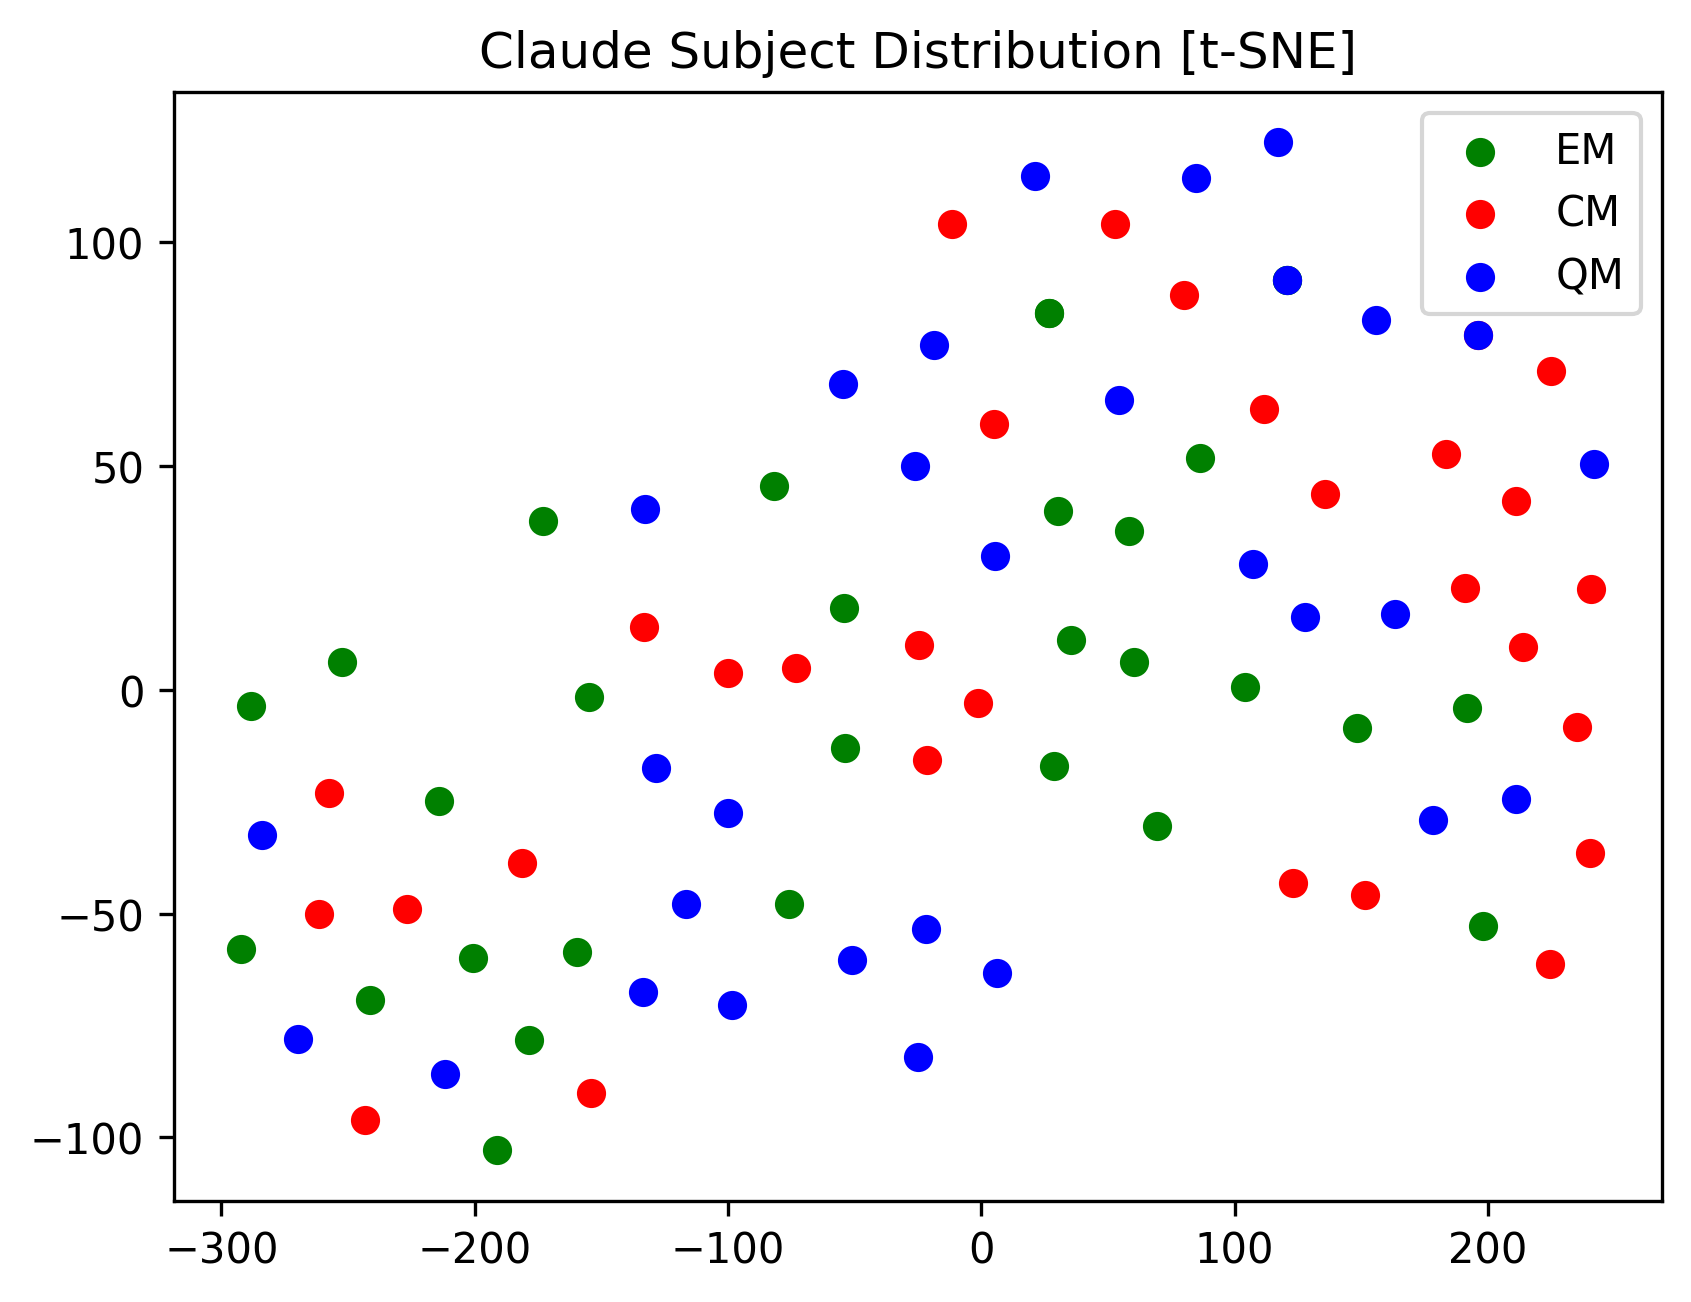

In [48]:
plt.figure()
plt.scatter(x_tsne[np.where(y==1),0], x_tsne[np.where(y==1), 1], color='g', label = "EM")
plt.scatter(x_tsne[np.where(y==2),0], x_tsne[np.where(y==2), 1], color='r', label = "CM")
plt.scatter(x_tsne[np.where(y==3),0], x_tsne[np.where(y==3), 1], color='b', label = "QM")
plt.title('Claude Subject Distribution [t-SNE]')
plt.legend()

There's something weird about this graph, the distribution of the marks for each subject don't match my understanding. t-SNE makes sure the distribution stays the same, but in this case it looks like the higher grades are lower down in the graph. I say this because most CM and QM points are at the bottom, but we know from the rgeression plots that they are usually clustered at the top. Will look into it further. 

In [41]:
clust_data_4 = tuple(map(tuple, x_tsne))

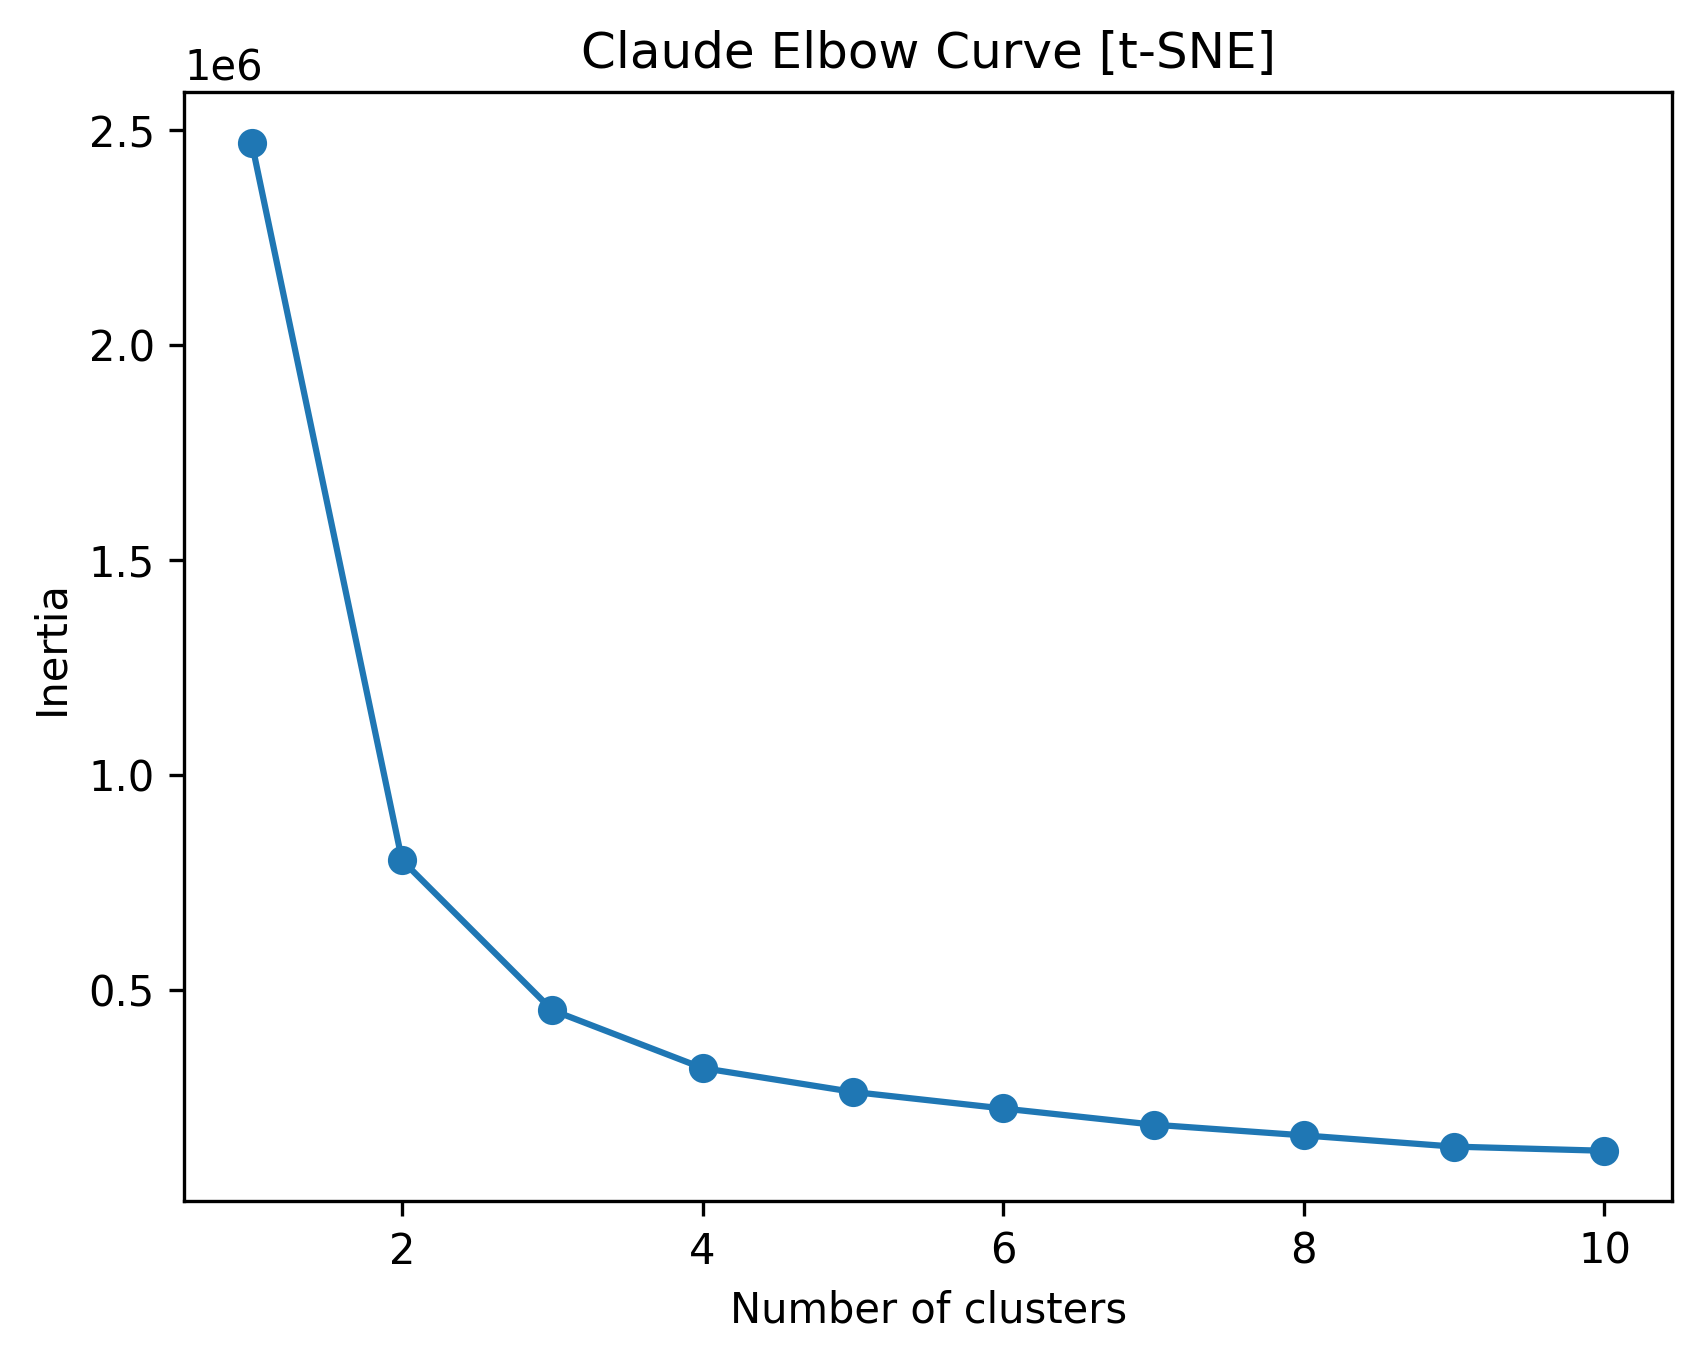

In [46]:
#Array for variation within each cluster
inertias = []

#We will calculate the variation for 10 clusters
for i in range(1,11): 
    kmeans = KMeans(n_clusters=i, n_init = 10)
    kmeans.fit(clust_data_4)
    inertias.append(kmeans.inertia_)

#plotting elbow curve    
plt.plot(range(1,11), inertias, marker='o')
plt.title('Claude Elbow Curve [t-SNE]')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

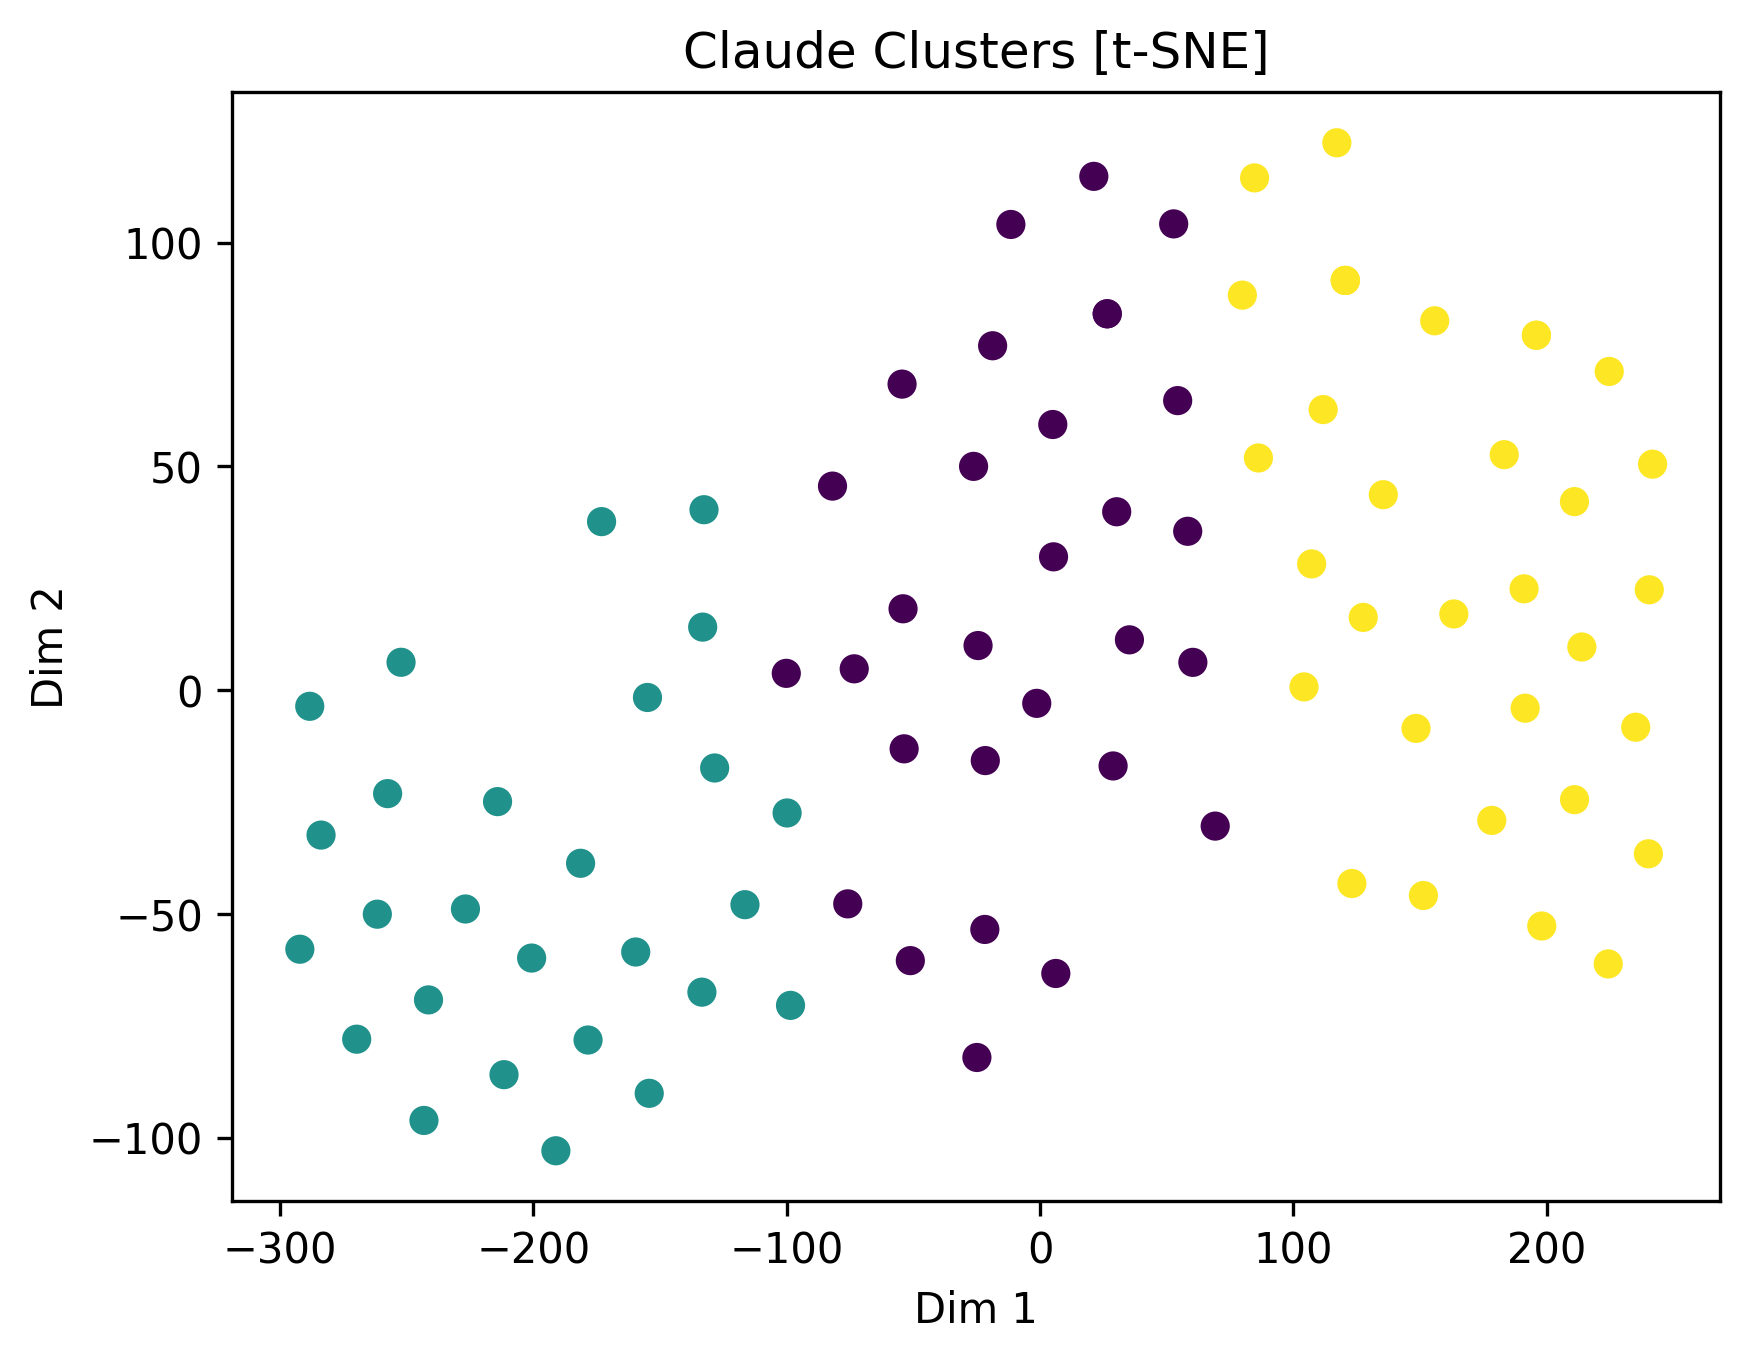

In [47]:
#Creating the classified data. Play around with n_clusters if you would like to see how data is classfied differently.
kmeans = KMeans(n_clusters=3, n_init = 10)
kmeans.fit(clust_data_4)

#Plotting classified data
plt.scatter(x_tsne[np.where(y>0),0], x_tsne[np.where(y>0), 1], c=kmeans.labels_)
plt.title('Claude Clusters [t-SNE]')
plt.xlabel('Dim 1')
plt.ylabel('Dim 2')
plt.show()

In [44]:
# Create a DataFrame to organize the cluster assignments and the labels (CM, QM, EM)
cluster_data = pd.DataFrame({'Cluster': kmeans.labels_, 'Label': y})

# Use the 'groupby' function to count how many of each label are in each cluster
cluster_summary = cluster_data.groupby(['Cluster', 'Label']).size().unstack(fill_value=0)

# Display the summary
print(cluster_summary)

Label     1   2   3
Cluster            
0        11   7   9
1         7  15  11
2        12   8  10
